In [1]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model  
from keras.optimizers import RMSprop
#导入mnist 数据集
from keras.datasets import mnist   
import matplotlib.pyplot as plt  

(x_train, y_train), (x_test, y_test) = mnist.load_data() 

Using TensorFlow backend.


11501568/11490434 [==============================] - 76s 7us/step


In [2]:
#因为keras的输入为张量，所以28x28的shape为(784,)
x_train = x_train.reshape(60000, 784)

x_test = x_test.reshape(10000, 784)
#循环遍历label集合，若某一类的标签不为1，则改为0（即将不是1的标签全部置位0，认为他们是一类）
for i, el in enumerate(y_train):
    if el!=1:
        y_train[i]=0
for i, el in enumerate(y_test):
    if el!=1:
        y_test[i]=0    
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#除以255，把数据正则化到0~1之间
x_train /= 255
x_test /= 255
#查看一下数据大小
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

#label为0或1共2个类别，keras要求格式为binary class matrices,转化一下，直接调用keras提供的这个函数
num_classes = 2
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


In [3]:
#构建一个sequential模型（即多个网络层的线性堆叠）
model = Sequential()
#模型需要知道输入数据的shape，因此，Sequential的第一层需要接受一个关于输入数据shape的参数，后面的各个层则可以自动的推导出中间数据的shape，因此不需要为每个层都指定这个参数。本层输出维度为2
#本层为softmax层，用于最后的分类
model.add(Dense(2, activation='softmax', input_shape=(784,)))
#打印出模型概况
model.summary()
#见上方参数介绍
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 1570      
Total params: 1,570
Trainable params: 1,570
Non-trainable params: 0
_________________________________________________________________


In [4]:
#一次前向传播的图片数量
batch_size = 128
#所有图片训练的次数
epochs = 2
#model.fit即开始训练
#shuffle 为打乱数据集
#validation_split=0.2表示从训练集中抽取20%做为验证集
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    shuffle=True,
                    validation_split=0.2,
                    verbose=1)
#保存模型
model.save('my_model1.h5')

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/2
48000/48000 [==============================] - 8s 165us/step - loss: 0.0772 - acc: 0.9744 - val_loss: 0.0305 - val_acc: 0.9913
Epoch 2/2
48000/48000 [==============================] - 2s 50us/step - loss: 0.0339 - acc: 0.9903 - val_loss: 0.0268 - val_acc: 0.9928


In [5]:
#加载刚刚训练好的模型
model = load_model('my_model1.h5')
#model. evaluate即开始测试
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02417141635119915
Test accuracy: 0.994


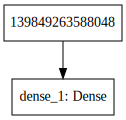

In [6]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model).create(prog='dot', format='svg'))